In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Final_dataset.csv")
print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW           Air              2008-05-02   
1         Haiti              EXW           Air              2008-02-18   
2        Guyana              EXW           Air              2008-09-04   
3  South Africa              DDP         Truck              2008-04-24   
4  South Africa              DDP         Truck              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price First Line Designation  \
0             6.50        0.01        0.00           

In [3]:
quantitative_columns = ['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'LineItemInsurance']

# Extract only the quantitative data (drop any non-numeric columns)
data_quantitative = data[quantitative_columns]

# Remove any rows with missing values (if applicable)
data_quantitative = data_quantitative.dropna()
data_quantitative

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance
0,650,6.50,0.01,0.00,0.01
1,2,278.00,139.00,1.39,0.44
2,240,2.40,0.01,0.00,0.00
3,6,405.06,67.51,0.25,0.65
4,600,870.00,1.45,0.01,1.39
...,...,...,...,...,...
6996,23,53.59,2.33,0.04,0.08
6997,23,53.59,2.33,0.04,0.08
6998,1004,8534.00,8.50,0.04,11.96
6999,25,169.00,6.76,0.11,0.24


In [4]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_quantitative)
normalized_data = pd.DataFrame(data_normalized, columns=quantitative_columns)
normalized_data

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance
0,-0.444078,-0.435110,-0.543259,-0.241211,-0.457077
1,-0.460221,-0.434236,3.385274,0.303203,-0.456132
2,-0.454292,-0.435123,-0.543259,-0.241211,-0.457099
3,-0.460122,-0.433826,1.364619,-0.143295,-0.455671
4,-0.445324,-0.432329,-0.502558,-0.237295,-0.454044
...,...,...,...,...,...
6996,-0.459698,-0.434958,-0.477685,-0.225545,-0.456923
6997,-0.459698,-0.434958,-0.477685,-0.225545,-0.456923
6998,-0.435259,-0.407649,-0.303291,-0.225545,-0.430818
6999,-0.459648,-0.434587,-0.352472,-0.198128,-0.456572


In [5]:
normalized_data = pd.DataFrame(data_normalized, columns=data_quantitative.columns)
normalized_data.to_csv("pca.csv", index=False)

In [6]:
null_values = normalized_data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Line Item Quantity    0
Line Item Value       0
Pack Price            0
Unit Price            0
LineItemInsurance     0
dtype: int64


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(normalized_data)
data_pca_2d

array([[-0.71618502, -0.61349501],
       [-1.04638   ,  2.52883631],
       [-0.72186149, -0.61302408],
       ...,
       [-0.69874627, -0.42922301],
       [-0.74060157, -0.44851283],
       [-0.82138807,  0.45978615]])

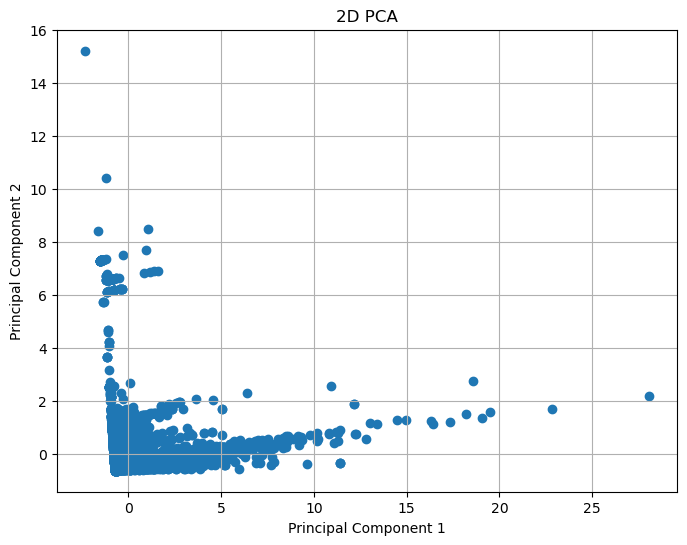

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1])
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

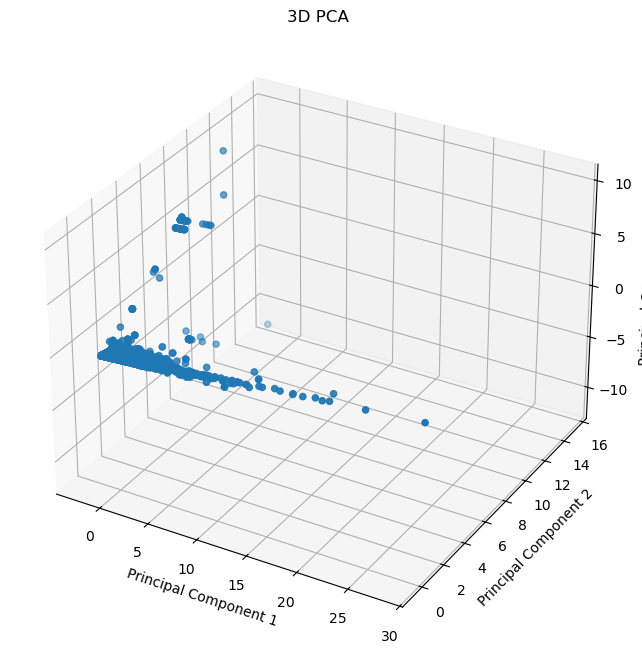

In [10]:
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(normalized_data)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2])
ax.set_title('3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [15]:
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

cumulative_variance_2d = explained_variance_2d.cumsum()
cumulative_variance_3d = explained_variance_3d.cumsum()

cumulative_variance_2d_percentage = cumulative_variance_2d * 100
cumulative_variance_3d_percentage = cumulative_variance_3d * 100

print(f"The percentage of information remained in the 2D dataset: {cumulative_variance_2d[-1] * 100:.2f}%")
print(f"The percentage of information remained in the 3D dataset: {cumulative_variance_3d[-1] * 100:.2f}%")

The percentage of information remained in the 2D dataset: 77.76%
The percentage of information remained in the 3D dataset: 94.55%


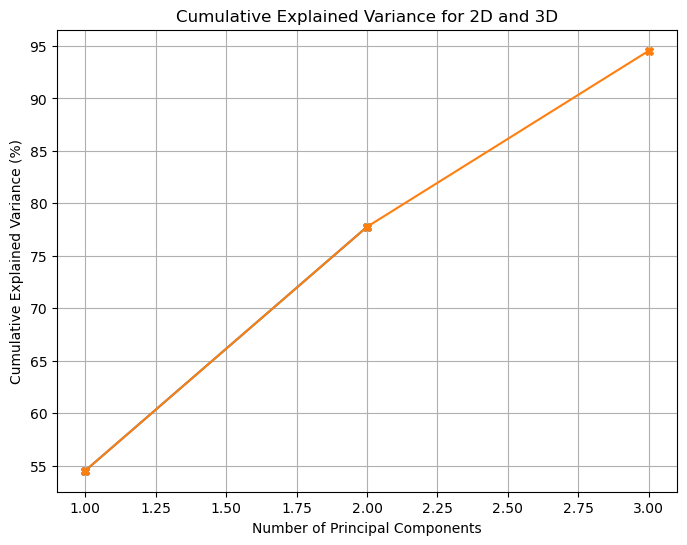

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_2d_percentage) + 1), cumulative_variance_2d_percentage, marker='X')
plt.plot(range(1, len(cumulative_variance_3d_percentage) + 1), cumulative_variance_3d_percentage, marker='X')
plt.title('Cumulative Explained Variance for 2D and 3D')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()

Number of dimensions needed to retain at least 95% of the variance: 4
Cumulative variance at 4 dimensions: 99.26%


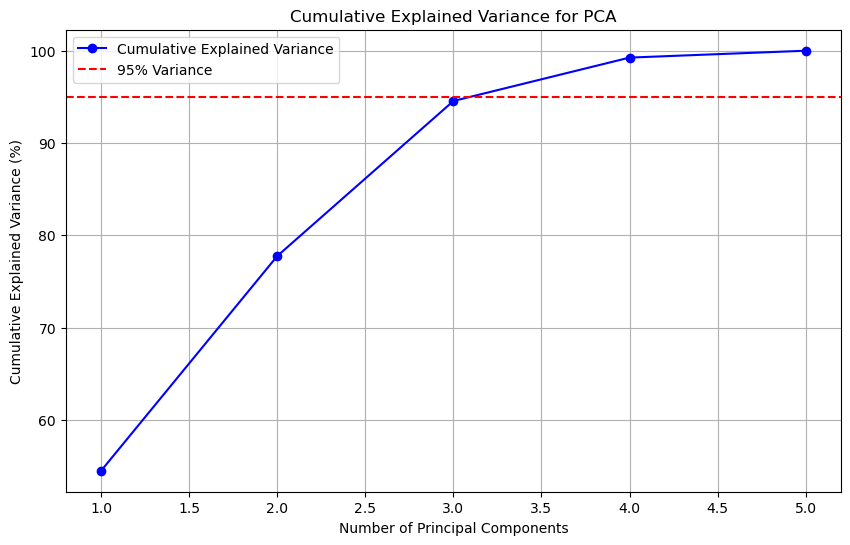

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(normalized_data)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
dimensions_needed = (cumulative_variance >= 0.95).argmax() + 1  

print(f"Number of dimensions needed to retain at least 95% of the variance: {dimensions_needed}")
print(f"Cumulative variance at {dimensions_needed} dimensions: {cumulative_variance[dimensions_needed - 1] * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', color='blue', label="Cumulative Explained Variance")
plt.axhline(y=95, color='red', linestyle='--', label="95% Variance")
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.legend()
plt.grid(True)
plt.show()

NORMALIZED EIGEN VALUES 

In [55]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(normalized_data)
eigenvalues = pca.explained_variance_
top_three_eigenvalues = np.sort(eigenvalues)[::-1][:3]

print(f"Top three eigenvalues: {top_three_eigenvalues}")

Top three eigenvalues: [2.72549174 1.16304137 0.83983346]
